In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [6]:
def acquire_data():
    df = pd.read_csv('anonymized-curriculum-access.txt', sep= ' ', names=['date', 'time', 'web_link', 'id', 'cohort', 'page' ])
    df['timestamp'] = df['date'] + ' '+ df['time']
    df.drop(columns=['date', 'time'], inplace= True)
    new_order = ['ip', 'id', 'cohort',  'timestamp', 'web_link']

    # use the reindex method to reorder the columns
    df = df.reindex(columns=new_order)
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df = df.set_index('timestamp').sort_index()
    return df

In [14]:
df = df = pd.read_csv('anonymized-curriculum-access.txt', sep= ' ', names=['date', 'time', 'web_link', 'id', 'cohort', 'page' ])

In [15]:
df

,date,time,web_link,id,cohort,page
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61
...,...,...,...,...,...,...
900218,2021-04-21,16:41:51,jquery/personal-site,64,28.0,71.150.217.33
900219,2021-04-21,16:42:02,jquery/mapbox-api,64,28.0,71.150.217.33
900220,2021-04-21,16:42:09,jquery/ajax/weather-map,64,28.0,71.150.217.33
900221,2021-04-21,16:44:37,anomaly-detection/discrete-probabilistic-methods,744,28.0,24.160.137.86


In [16]:
df.groupby('id')[['page','date','cohort']].nunique()

,page,date,cohort
id,,,
1,35,637,2
2,12,83,1
3,25,107,1
4,11,54,1
5,4,82,1
...,...,...,...
977,6,10,1
978,4,9,1
979,7,9,1


In [24]:
id_counts = df.groupby('id')[['page','date','cohort']].nunique()

In [25]:
cohort_counts = df.groupby('cohort')[['page','date','id']].nunique()

In [27]:
cohort_counts.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 47 entries, 1.0 to 139.0
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   page    47 non-null     int64
 1   date    47 non-null     int64
 2   id      47 non-null     int64
dtypes: int64(3)
memory usage: 1.5 KB


In [28]:
cohort_counts

,page,date,id
cohort,,,
1.0,46,278,18
2.0,6,12,3
4.0,1,1,1
5.0,1,1,1
6.0,12,12,2
7.0,29,46,6
8.0,14,162,5
9.0,1,1,1
11.0,14,18,5


<AxesSubplot:>

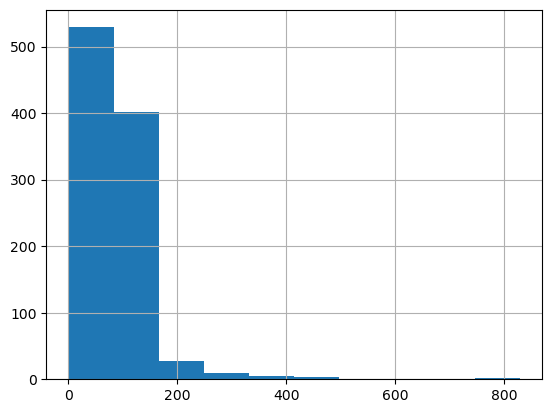

In [29]:
id_counts.date.hist()

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900223 entries, 0 to 900222
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   date      900223 non-null  object 
 1   time      900223 non-null  object 
 2   web_link  900222 non-null  object 
 3   id        900223 non-null  int64  
 4   cohort    847330 non-null  float64
 5   page      900223 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 41.2+ MB


In [32]:
df['date'] = pd.to_datetime(df['date'])
first_access = df.groupby('id').date.min()

In [33]:
first_access

id
1     2018-01-26
2     2018-01-26
3     2018-01-26
4     2018-01-26
5     2018-01-26
         ...    
977   2021-04-12
978   2021-04-12
979   2021-04-12
980   2021-04-13
981   2021-04-19
Name: date, Length: 981, dtype: datetime64[ns]

In [35]:
first_access_date = pd.DataFrame({'first_access_date':first_access}).reset_index()

In [36]:
first_access_date

,id,first_access_date
0,1,2018-01-26
1,2,2018-01-26
2,3,2018-01-26
3,4,2018-01-26
4,5,2018-01-26
...,...,...
976,977,2021-04-12
977,978,2021-04-12
978,979,2021-04-12
979,980,2021-04-13


In [37]:
first_access_date.first_access_date.nunique()

251

In [39]:
id_by_first_access_date = first_access_date.groupby(['first_access_date']).count()

In [41]:
id_by_first_access_date.head()

,id
first_access_date,
2018-01-26,50
2018-01-27,2
2018-01-28,2
2018-01-29,12
2018-01-30,7


Text(0.5, 1.0, 'number of first access counts over time')

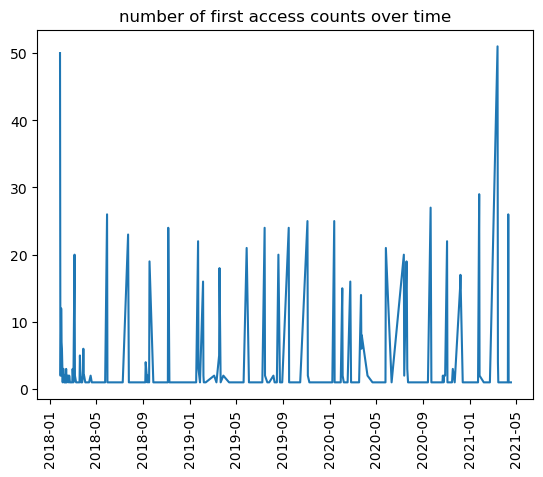

In [43]:
plt.plot(id_by_first_access_date)
plt.xticks(rotation=90)
plt.title('number of first access counts over time')

In [45]:
page_views = df.groupby(['id'])['page'].agg(['count', 'nunique'])

<AxesSubplot:>

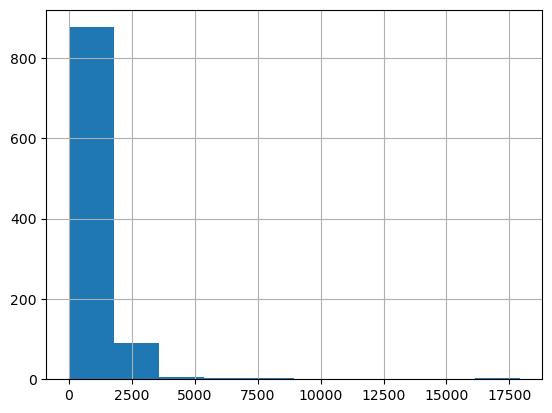

In [47]:
page_views['count'].hist()

<AxesSubplot:>

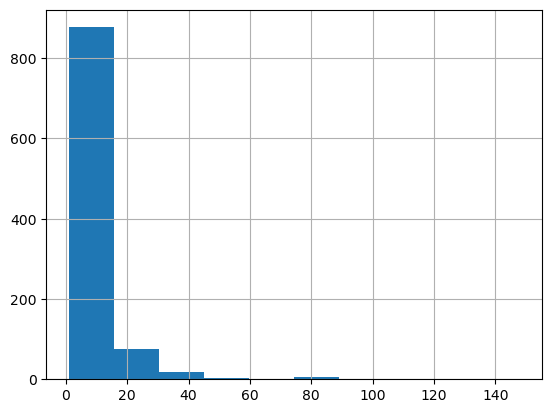

In [49]:
page_views['nunique'].hist()